## PHYS 105A:  Introduction to Scientific Computing

# Integration of Differential Equations I

Chi-kwan Chan

## Importance of Integration in Physics

* Physical (dynamic) systems are very often described by ordinary differential equations, examples include Newton's second law:
   $f = m a = m \frac{dx^2}{dt^2}$.
   
* For fields, their are described by partial differential equations.

* In order to predict how physical systems behave, we need to integrate these diffrential equations.

## Problem Definition

* Consider the following two problems:

  $\frac{dx}{dt} = f(t)$
  
  $\frac{dx}{dt} = f(x, t)$

* The **key** different is that the righ hand side (RHS) of the first equation depends only on the independent variable $t$; while the RHS of the second equation depends also on the dependent variable $x$.



## Problem Definition

* To solve the first equation, we simply perform:

  $x(t) = x(t_0) + \int_{t_0}^t dt' f(t')$

  We covered "Nmerical Integration of Functions" in lecture #7.
  
* Because the RHS depends on $x$, we **CANNOT** do the same for the second equation.

  $x(t) = x(t_0) + \int_{t_0}^t dt' f(x, t')\ \ \ $ [cannot simply integrate because of $x$ on the RHS]

  We will learn how to solve for the second equation this time.

## Numerical Solution of ODEs: an Ingegration Strategy

* Although analytically carry out

  $x(t) = x(t_0) + \int_{t_0}^t dt' f(x, t')$
  
  would not work, how bad is it if we think about **Numerical approximation**?
  
* Specifically, consider $t - t_0$ is small so $x$ does not change much, and hence $f(x, t)$ does not change much?

* Then using what we learned from lecture 7,

  $\int_{t_0}^t dt' f(x, t') \approx f(x(t'), t') (t - t_0)$
  
  where $t_0 \lesssim t' \lesssim t$.
  
* Choosing $t' = t_0$ corresponds to the *left Riemann sum*.

* Choosing $t' = t$ corresponds to the *right Riemann sum*.

## Numerical Solution of ODEs: an Ingegration Strategy

* Define $\Delta t \equiv t - t_0$.

* Substitute the above approximation back to the ODE, we have

  $x(t) \approx x(t_0) + f(x(t'), t') \Delta t$
  
* In general, we do not know the right hand side because $x(t')$ is unsolved.

* However, if we choose $t' = t_0$, i.e., the left Riemann sum, we have

  $x(t) \approx x(t_0) + f(x(t_0), t_0) \Delta t$
  
  Then the right hand side is **known**!
  
* This is called the Euler's method:

  $x_{n+1} = x_n + f(x_n, t_n) \Delta t$

## Numerical Solution of ODEs: a Differential Strategy

* Alternatively, we may look at the differential equation itself:

  $\frac{dx}{dt} = f(x, t)$
  
  and consider that differention is a limit:
  
  $\left.\frac{dx}{dt}\right|_{t_0}
  = \lim_{t \rightarrow t_0} \frac{x(t) - x(t_0)}{t - t_0}$
  
* Using a *finite difference* approximation:

  $\left.\frac{dx}{dt}\right|_{t_0}
  \approx \frac{x(t) - x(t_0)}{t - t_0}$

## Numerical Solution of ODEs: a Differential Strategy
  
* Therefore,

  $\frac{x(t) - x(t_0)}{t - t_0} \approx f(x, t)$
  
  $x(t) \approx x(t_0) + f(x_0, t_0) \Delta t$
 
* Which is again our Euler's method:

  $x_{n+1} = x_n + f(x_n, t_n) \Delta t$

## Simple Example:

* Let's consider solving the simpmle differential equation:

  $\frac{dx}{dt} = x(t)$.
  
* This equation has the solution $x(t) = e^{t-t_0}$.

* If we use the initial condition $x(0) = 1$, the solution reduces to the simple form $x(t) = e^t$.

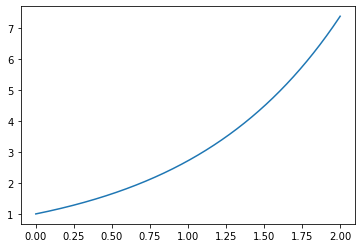

In [1]:
# Let's visualize the solution:

import numpy as np
from matplotlib import pyplot as plt

Tp = np.linspace(0, 2, 2001)
Xp = np.exp(Tp)

plt.plot(Tp, Xp)

In [2]:
# Let's implement Euler's method

def forwardEuler(f, x, t, dt, n):
    T = [t]
    X = [x]
    for i in range(n):
        t += dt
        x += f(x) * dt
        T.append(t)
        X.append(x)
    return T, X

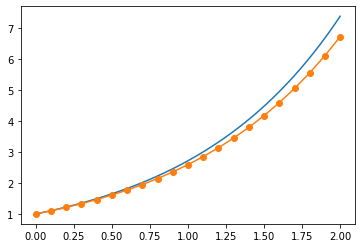

In [3]:
# Let's test Euler's method

def f(x):
    return x

T, X = forwardEuler(f, 1, 0, 0.1, 20)

plt.plot(Tp, Xp)
plt.plot(T,  X, 'o-')

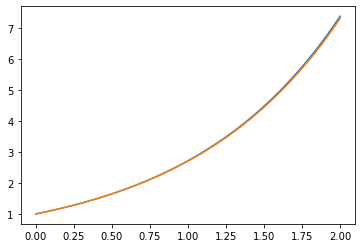

In [4]:
# The accuracy should increase when we use a small step

T, X = forwardEuler(f, 1, 0, 0.01, 200)

plt.plot(Tp, Xp)
plt.plot(T,  X)

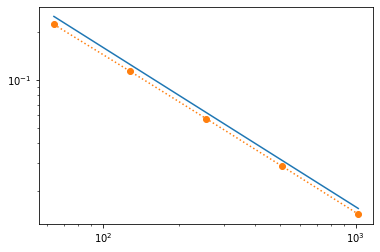

In [5]:
# As always, we can study the convergence of the numerical method

def error(N=200):
    T, X = forwardEuler(f, 1, 0, 2/N, N)
    Xp = np.exp(T)
    return np.max(abs(X - Xp))

N = np.array([64, 128, 256, 512, 1024])
E = np.array([error(n) for n in N])

plt.loglog(N, 16/N)
plt.loglog(N, E, 'o:')

## System of ODEs

* Given this is an introduction to computational physics course, we are interested in solving, e.g., Newton's equation:

  $m \frac{d^2 x}{dt^2} = f(x, t)$
  
* We can trivially cast this second order ODE into a system of two first order ODEs:
 
  $\frac{dx}{dt} = v$
  
  $\frac{dv}{dt} = \frac{1}{m}f(x, t)$
  
* Using "vector" notation, we define $Y = [x, v]^t$ and $F = [v, f/m]^t$ so that
 
  $\frac{dY}{dt} = F(Y, t)$.

## Simple Gravity Pendulum

![Pendulum](https://upload.wikimedia.org/wikipedia/commons/2/24/Oscillating_pendulum.gif)

## Simple Gravity Pendulum

* Equation of motion:

  $\frac{d^2\theta}{dt^2} + \frac{g}{l} \sin\theta = 0$
  
* Convert to a system of two first order ODEs:

  $\frac{d\theta(t)}{dt} = \Omega(t)$
  
  $\frac{d\Omega(t)}{dt} = - \frac{g}{l}\sin\theta(t)$
  
* In vector notation:

  $\frac{dY(t)}{dt} = F(Y, t)$
  
  where $Y = [\theta(t), \Omega(t)]^t$ and $F = \left[\Omega(t), -\frac{g}{l}\sin\theta(t)\right]^t$.
  
* While this is an excellent problem to solve numericallly, the exact solution is difficult to derive. 

## Simple Harmonic Oscillator

* We may take the limit that $\theta$ is small so $\sin\theta \approx \theta$ and first study the simple harmonic oscillator.

* Equation of motion:

  $\frac{d^2\theta}{dt^2} + \frac{g}{l}\theta = 0$
  
* Convert to a system of two first order ODEs:

  $\frac{d\theta(t)}{dt} = \Omega(t)$
  
  $\frac{d\Omega(t)}{dt} = - \frac{g}{l}\theta(t)$

* In vector notation:

  $\frac{dY(t)}{dt} = F(Y, t)$
  
  where $Y = [\theta(t), \Omega(t)]^t$ and $F = \left[\Omega(t), -\frac{g}{l}\theta(t)\right]^t$.

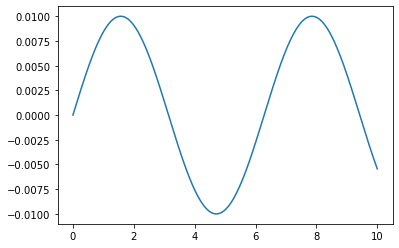

In [6]:
# Let's first plot the analytical solution

Tp     = np.linspace(0, 10, 1001)
Thetap = 0.01 * np.sin(Tp)

plt.plot(Tp, Thetap)

In [7]:
# Thanks to operator overriding,
# our forward Euler method is almost ready to solve system of ODEs

def forwardEuler(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    for i in range(n):
        t += dt
        x += np.array(f(*x)) * dt
        T = np.append( T, t )
        X = np.vstack((X, x))
    return T, X

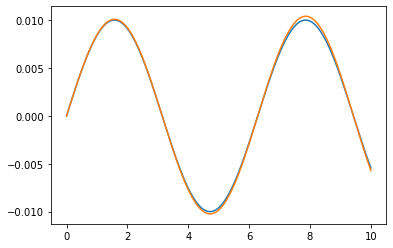

In [8]:
# Compare the analytical and numerical solutions

def f(theta, omega):
    return omega, -theta

T, X = forwardEuler(f, (0, 0.01), 0, 0.01, 1000)

Theta = X[:,0]
Omega = X[:,1]

plt.plot(Tp, Thetap)
plt.plot(T,  Theta)

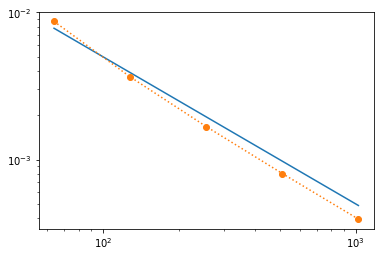

In [9]:
# Again, we can study the convergence of the numerical method

def error(N=100):
    T, X = forwardEuler(f, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

N = np.array([64, 128, 256, 512, 1024])
E = np.array([error(n) for n in N])

plt.loglog(N, 0.5/N)
plt.loglog(N, E, 'o:')